In [ ]:
import tensorflow as tf


print(tf.__version__)


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


cifar10 = tf.keras.datasets.cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()


fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


K = len(set(y_train))


print("number of classes:", K)


i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)


x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)


x = Dense(K, activation='softmax')(x)

model = Model(i, x)


model.summary()

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=50)




Testing activation function: relu
Epoch 1/50
1563/1563 [==============================] - 19s 9ms/step - loss: 1.3102 - accuracy: 0.5522 - val_loss: 0.9563 - val_accuracy: 0.6607
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8480 - accuracy: 0.7052 - val_loss: 0.9051 - val_accuracy: 0.6880
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6995 - accuracy: 0.7593 - val_loss: 0.7828 - val_accuracy: 0.7337
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5887 - accuracy: 0.7962 - val_loss: 0.7292 - val_accuracy: 0.7578
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5072 - accuracy: 0.8254 - val_loss: 0.7715 - val_accuracy: 0.7469
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4267 - accuracy: 0.8524 - val_loss: 0.6348 - val_accuracy: 0.7959
Epoch 7/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3586 - accuracy:

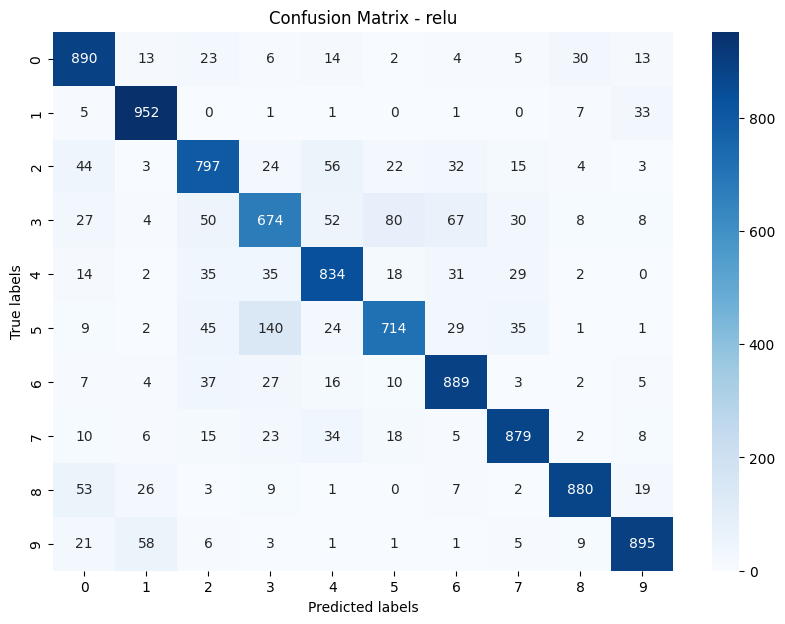

Testing activation function: sigmoid
Epoch 1/50
1563/1563 [==============================] - 19s 9ms/step - loss: 1.3338 - accuracy: 0.5290 - val_loss: 1.5356 - val_accuracy: 0.4822
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8780 - accuracy: 0.6920 - val_loss: 0.9857 - val_accuracy: 0.6548
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7299 - accuracy: 0.7426 - val_loss: 0.6987 - val_accuracy: 0.7580
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6282 - accuracy: 0.7810 - val_loss: 0.7419 - val_accuracy: 0.7485
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5495 - accuracy: 0.8076 - val_loss: 0.9606 - val_accuracy: 0.6881
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4845 - accuracy: 0.8297 - val_loss: 0.7454 - val_accuracy: 0.7487
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4289 - accurac

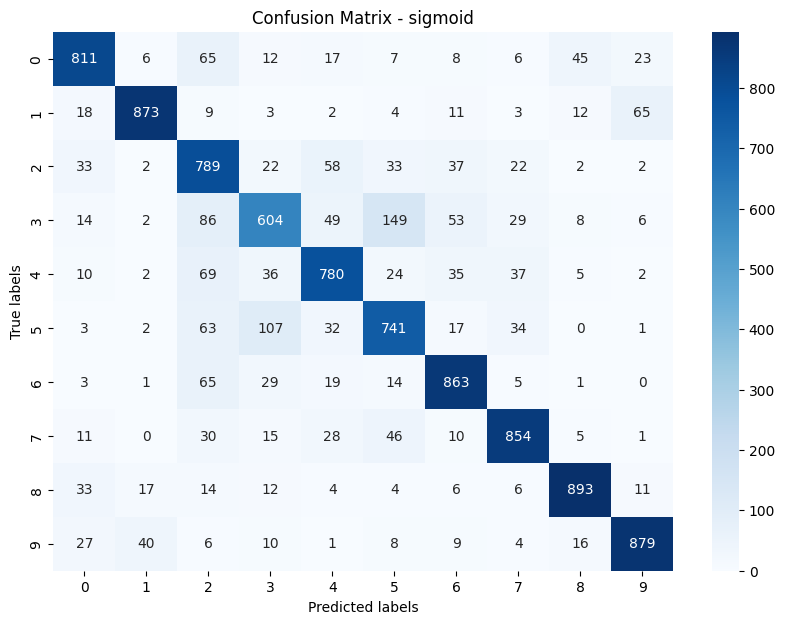

Testing activation function: tanh
Epoch 1/50
1563/1563 [==============================] - 19s 9ms/step - loss: 1.6410 - accuracy: 0.4389 - val_loss: 1.4787 - val_accuracy: 0.4685
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1745 - accuracy: 0.5879 - val_loss: 1.3081 - val_accuracy: 0.5578
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0211 - accuracy: 0.6442 - val_loss: 1.1988 - val_accuracy: 0.5945
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9426 - accuracy: 0.6718 - val_loss: 1.1502 - val_accuracy: 0.6130
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8956 - accuracy: 0.6883 - val_loss: 1.0176 - val_accuracy: 0.6579
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8540 - accuracy: 0.7034 - val_loss: 0.9732 - val_accuracy: 0.6603
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8372 - accuracy: 

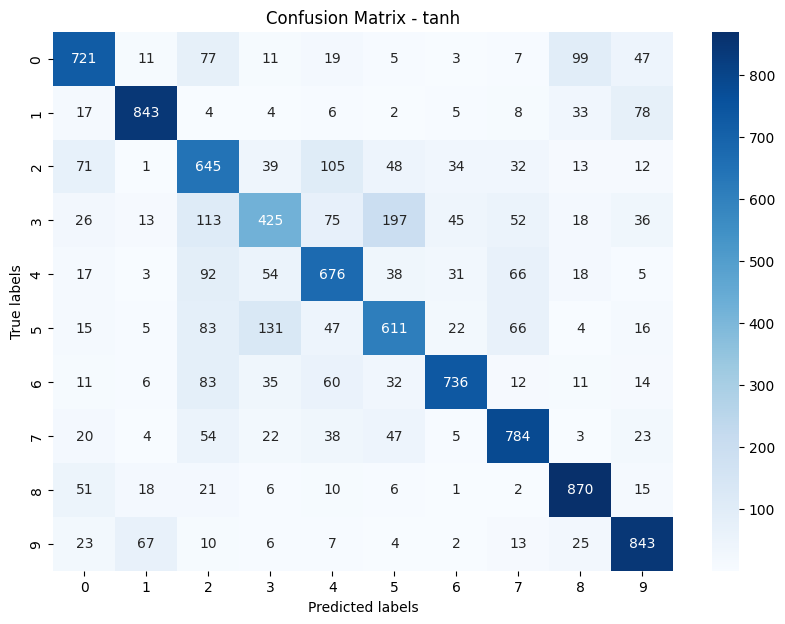

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load and preprocess the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Define activation functions to try
activation_functions = [tf.keras.activations.relu, tf.keras.activations.sigmoid, tf.keras.activations.tanh]

# Iterate over activation functions
for activation_function in activation_functions:
    print(f"Testing activation function: {activation_function.__name__}")

    # Build the model using the functional API
    i = Input(shape=x_train[0].shape)
    x = Conv2D(32, (3, 3), activation=activation_function, padding='same')(i)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation=activation_function, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation=activation_function, padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation=activation_function, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation=activation_function, padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation=activation_function, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dropout(0.2)(x)

    x = Dense(1024, activation=activation_function)(x)
    x = Dropout(0.2)(x)

    x = Dense(len(set(y_train)), activation='softmax')(x)

    model = Model(i, x)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1)

    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Generate classification report
    nb_report = classification_report(y_test, y_pred_labels)
    print(nb_report)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_labels)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {activation_function.__name__}")
    plt.show()



Testing configuration: {'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1)}
Epoch 1/50
1563/1563 [==============================] - 13s 6ms/step - loss: 1.3414 - accuracy: 0.5263 - val_loss: 1.1045 - val_accuracy: 0.6077
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9771 - accuracy: 0.6553 - val_loss: 0.9565 - val_accuracy: 0.6637
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8405 - accuracy: 0.7053 - val_loss: 0.9585 - val_accuracy: 0.6602
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7465 - accuracy: 0.7405 - val_loss: 0.8933 - val_accuracy: 0.6986
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6728 - accuracy: 0.7640 - val_loss: 0.7667 - val_accuracy: 0.7309
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6036 - accuracy: 0.7894 - val_loss: 0.8700 - val_accuracy: 0.7063
Epoch 7/50
1563/1563 [==============================]

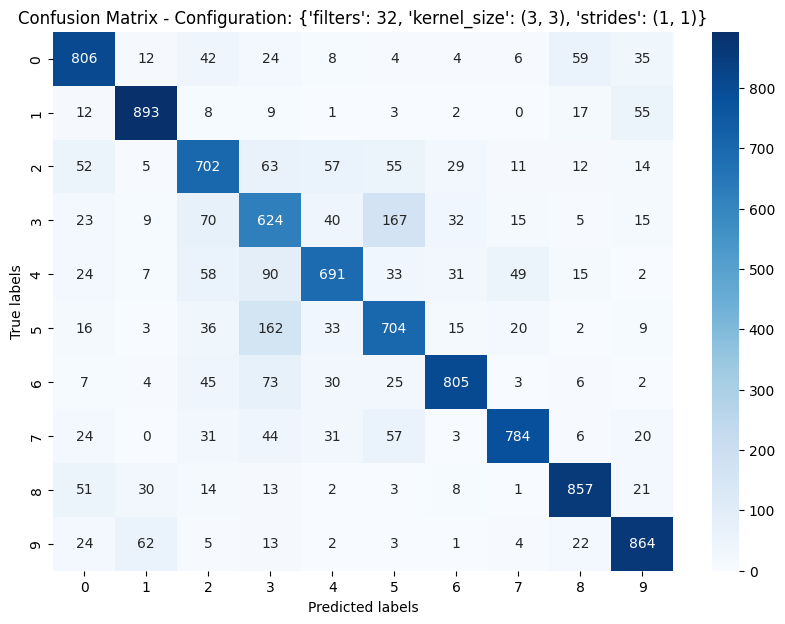

Testing configuration: {'filters': 64, 'kernel_size': (5, 5), 'strides': (1, 1)}
Epoch 1/50
1563/1563 [==============================] - 25s 7ms/step - loss: 1.4060 - accuracy: 0.5086 - val_loss: 1.3473 - val_accuracy: 0.5218
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9841 - accuracy: 0.6542 - val_loss: 1.2347 - val_accuracy: 0.5797
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8112 - accuracy: 0.7175 - val_loss: 1.0903 - val_accuracy: 0.6307
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6957 - accuracy: 0.7572 - val_loss: 1.2613 - val_accuracy: 0.5898
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6001 - accuracy: 0.7923 - val_loss: 0.9374 - val_accuracy: 0.6933
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5211 - accuracy: 0.8163 - val_loss: 0.7305 - val_accuracy: 0.7597
Epoch 7/50
1563/1563 [===========================

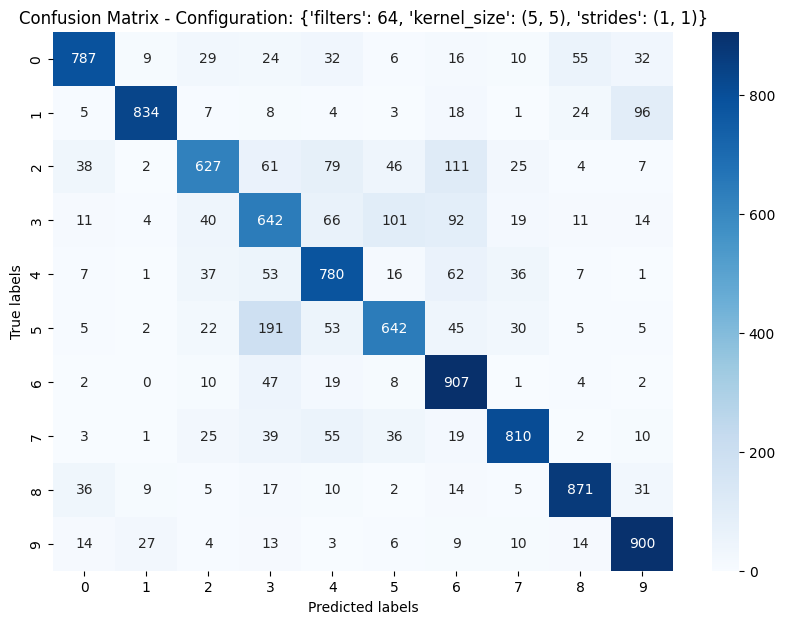

Testing configuration: {'filters': 128, 'kernel_size': (3, 3), 'strides': (1, 1)}
Epoch 1/50
1563/1563 [==============================] - 17s 8ms/step - loss: 1.3642 - accuracy: 0.5291 - val_loss: 1.6643 - val_accuracy: 0.4558
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9179 - accuracy: 0.6800 - val_loss: 1.1824 - val_accuracy: 0.5860
Epoch 3/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7574 - accuracy: 0.7346 - val_loss: 1.3752 - val_accuracy: 0.5584
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6390 - accuracy: 0.7776 - val_loss: 0.8922 - val_accuracy: 0.7095
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5529 - accuracy: 0.8080 - val_loss: 0.7348 - val_accuracy: 0.7575
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4642 - accuracy: 0.8389 - val_loss: 0.8422 - val_accuracy: 0.7127
Epoch 7/50
1563/1563 [==========================

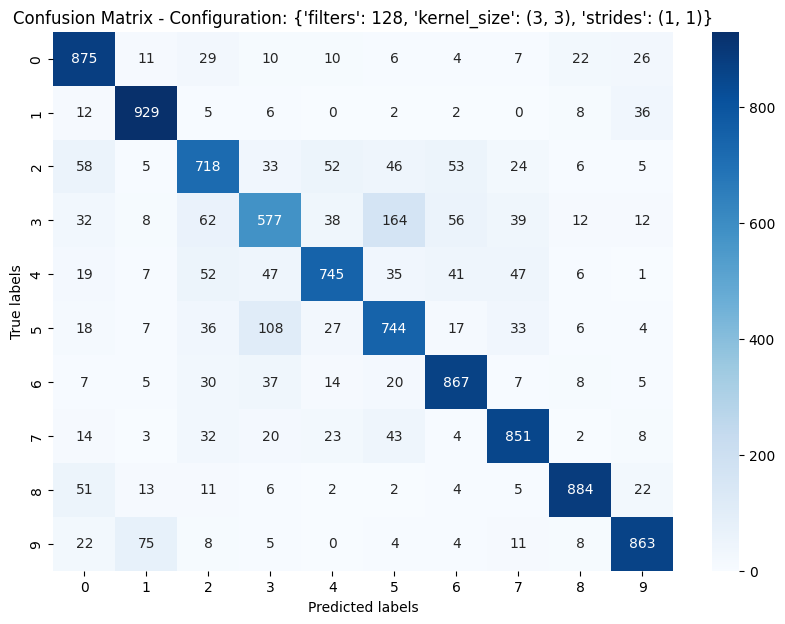

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load and preprocess the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Convolutional layer configurations to try
configurations = [
    {'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1)},
    {'filters': 64, 'kernel_size': (5, 5), 'strides': (1, 1)},
    {'filters': 128, 'kernel_size': (3, 3), 'strides': (1, 1)},
]

activation_function = tf.keras.activations.relu

# Iterate over configurations
for config in configurations:
    print(f"Testing configuration: {config}")

    # Build the model using the functional API
    i = Input(shape=x_train[0].shape)
    x = Conv2D(config['filters'], config['kernel_size'], strides=config['strides'], activation=activation_function, padding='same')(i)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(config['filters'], config['kernel_size'], strides=config['strides'], activation=activation_function, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(config['filters'], config['kernel_size'], strides=config['strides'], activation=activation_function, padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)


    x = Flatten()(x)
    x = Dropout(0.2)(x)

    x = Dense(1024, activation=activation_function)(x)
    x = Dropout(0.2)(x)

    x = Dense(len(set(y_train)), activation='softmax')(x)

    model = Model(i, x)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1)

    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Generate classification report
    nb_report = classification_report(y_test, y_pred_labels)
    print(nb_report)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_labels)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - Configuration: {config}")
    plt.show()



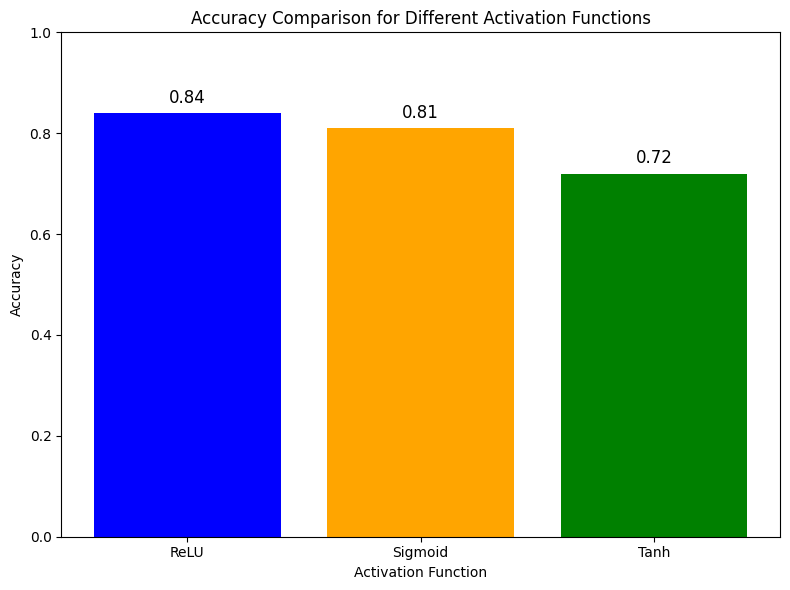

In [ ]:
import matplotlib.pyplot as plt

# Activation functions and their accuracies
activation_functions = ['ReLU', 'Sigmoid', 'Tanh']
accuracies = [0.84, 0.81, 0.72]  # Replace with your actual accuracy values

# Bar colors for each activation function
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(8, 6))
bars = plt.bar(activation_functions, accuracies, color=colors)

plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Activation Functions')
plt.ylim(0, 1)  # Set y-axis range between 0 and 1

# Adding accuracy values above the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black', fontsize=12)

plt.tight_layout()

# Show plot
plt.show()



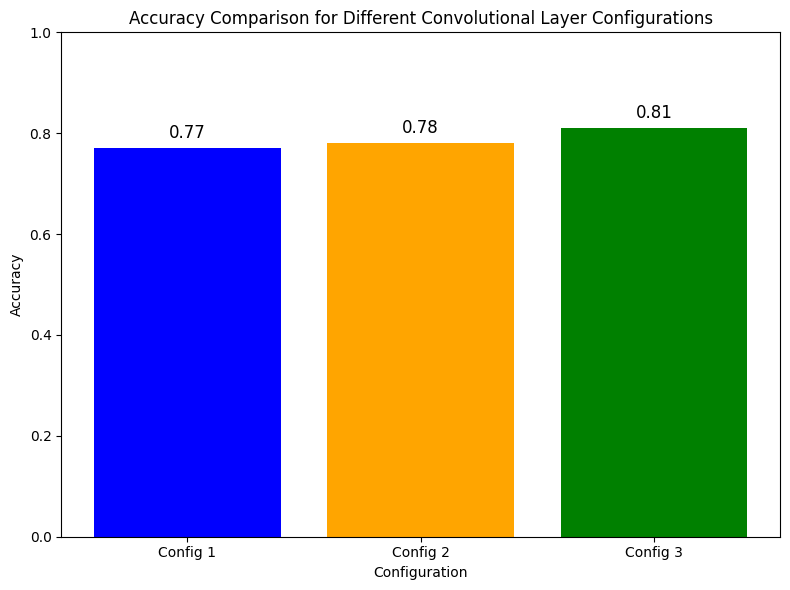

In [ ]:
import matplotlib.pyplot as plt

# Configuration details and their accuracies
configurations = [
    {'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'accuracy': 0.77},
    {'filters': 64, 'kernel_size': (5, 5), 'strides': (1, 1), 'accuracy': 0.78},
    {'filters': 128, 'kernel_size': (3, 3), 'strides': (1, 1), 'accuracy': 0.81}
]

# Bar colors for each configuration
colors = ['blue', 'orange', 'green']

config_labels = [f"Config {i+1}" for i in range(len(configurations))]
accuracies = [config['accuracy'] for config in configurations]

plt.figure(figsize=(8, 6))
bars = plt.bar(config_labels, accuracies, color=colors)

plt.xlabel('Configuration')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Convolutional Layer Configurations')
plt.ylim(0, 1)  # Set y-axis range between 0 and 1

# Adding accuracy values above the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black', fontsize=12)

plt.tight_layout()

# Show plot
plt.show()
